5. Gere uma variável aleatória 𝑋 com distribuição normal padronizada contendo 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [9]:
mu=0
sigma=1
X = np.random.randn(1000)

- 5.1. Faça um histograma de 𝑋 e sobre ele plote a pdf N(0,1)

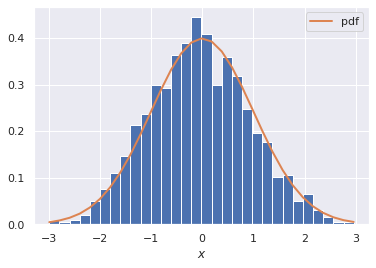

In [13]:
fig, ax = plt.subplots()
count, bins, _ = ax.hist(X, bins=30, density=True)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)),linewidth=2, label='pdf')
plt.legend()
plt.xlabel("$x$")
plt.show()

- 5.2 Faça um histograma de $Y=X^2$ e sobre ele plote a pdf $X_{1}^2$

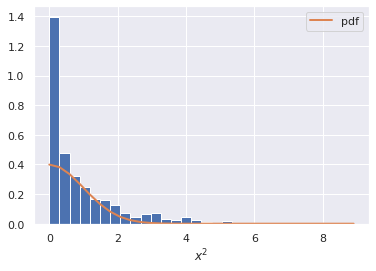

In [16]:
Y = X**2
fig, ax = plt.subplots()
count, bins, _ = ax.hist(Y, bins=30, density=True)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)),linewidth=2, label='pdf')
plt.legend()
plt.xlabel("$x^2$")
plt.show()